## 9. Kears ( Tensorflow )

In [ ]:
import tensorflow as tf

tf.__version__

'2.9.2'

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import numpy as np

np.__version__

'1.21.6'

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 2s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
help(mnist)

Help on package keras.api._v2.keras.datasets.mnist in keras.api._v2.keras.datasets:

NAME
    keras.api._v2.keras.datasets.mnist - MNIST handwritten digits dataset.

PACKAGE CONTENTS


FILE
    /usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py




In [ ]:
assert X_train.shape[-1] == 28
assert X_train.shape == (60000, 28, 28)

In [ ]:
assert X_train.shape[-1] == 1 # 검증 부분

AssertionError: ignored

In [ ]:
X_train, X_test = X_train / 255., X_test / 255.

In [ ]:
sample = X_train[2580]

print("answer: ", y_train[2580])
for i in range(sample.shape[0]): # 28
    print(
        "".join(["1" if elem > 0 else "0" for elem in sample[i]])
    )


answer:  3
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000001111000000000
0000000000000111111000000000
0000000001111111111000000000
0000000001111111111000000000
0000000001111001111000000000
0000000000000111110000000000
0000000000001111100000000000
0000000000001111100000000000
0000000000001111000000000000
0000000000000111100000000000
0000000000000111100000000000
0000000000000011100000000000
0000000000000111100000000000
0000000000000111100000000000
0000000000001111000000000000
0000000000001111000000000000
0000000000011110000000000000
0000000001111110000000000000
0000000011111100000000000000
0000000111111000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000


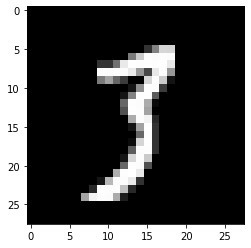

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[2580], cmap="gray")

plt.show()

In [ ]:
X_train.shape[1:]

(28, 28)

In [ ]:
100480 / (784 + 1)
# 784: 필요한 weight 수

128.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1024, activation="relu"),
    # Dropout(0.2),
    Dense(256, activation="relu"),
    Dense(16, activation="relu"),
    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 16)                4112      
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 1,070,522
Trainable params: 1,070,522
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    # loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
history = model.fit(
    X_train, y_train, 
    validation_split=0.25,
    batch_size=600,
    epochs=10
)
history

Epoch 1/10
75/75 [==============================] - 5s 15ms/step - loss: 0.5278 - accuracy: 0.8436 - val_loss: 0.2026 - val_accuracy: 0.9413
Epoch 2/10
75/75 [==============================] - 1s 7ms/step - loss: 0.1585 - accuracy: 0.9538 - val_loss: 0.1476 - val_accuracy: 0.9574
Epoch 3/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0989 - accuracy: 0.9710 - val_loss: 0.1198 - val_accuracy: 0.9635
Epoch 4/10
75/75 [==============================] - 1s 8ms/step - loss: 0.0705 - accuracy: 0.9801 - val_loss: 0.1027 - val_accuracy: 0.9693
Epoch 5/10
75/75 [==============================] - 0s 6ms/step - loss: 0.0490 - accuracy: 0.9856 - val_loss: 0.0971 - val_accuracy: 0.9719
Epoch 6/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0350 - accuracy: 0.9901 - val_loss: 0.0911 - val_accuracy: 0.9743
Epoch 7/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0257 - accuracy: 0.9933 - val_loss: 0.0882 - val_accuracy: 0.9763
Epoch 8/10
75/75 [

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0724 - accuracy: 0.9795


[0.0723879337310791, 0.9794999957084656]

In [ ]:
# history = model.fit(
#     X_train, y_train, 
#     validation_data=(X_test, y_test),
#     batch_size=600,
#     epochs=100
# )
# history

In [ ]:
history.history

{'loss': [0.5277785658836365,
  0.15852688252925873,
  0.09892139583826065,
  0.0705045759677887,
  0.04896154999732971,
  0.03504278138279915,
  0.02571474015712738,
  0.01800154522061348,
  0.01114437635987997,
  0.008579871617257595],
 'accuracy': [0.8436444401741028,
  0.953844428062439,
  0.970977783203125,
  0.9801111221313477,
  0.985622227191925,
  0.9901111125946045,
  0.9932888746261597,
  0.9951555728912354,
  0.9976222515106201,
  0.998199999332428],
 'val_loss': [0.20261946320533752,
  0.14757582545280457,
  0.11981212347745895,
  0.10269669443368912,
  0.0971212163567543,
  0.09114453941583633,
  0.08822212368249893,
  0.09886519610881805,
  0.09105269610881805,
  0.0899730920791626],
 'val_accuracy': [0.941266655921936,
  0.9574000239372253,
  0.963533341884613,
  0.9693333506584167,
  0.9718666672706604,
  0.9743333458900452,
  0.9763333201408386,
  0.9727333188056946,
  0.9757333397865295,
  0.9762666821479797]}

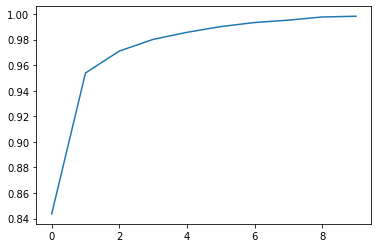

In [ ]:
import matplotlib.pyplot as plt

length = len(history.history["accuracy"])
plt.plot(range(length), history.history["accuracy"])
plt.show()

## 10. Sequential Model

In [ ]:
x = tf.ones((3, 3))
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(2, activation="relu", name="layer1"),
    layers.Dense(3, activation="sigmoid", name="layer2"),
    layers.Dense(4, name="layer3"),
])

model

In [ ]:
model.__call__

<bound method Model.__call__ of <keras.engine.sequential.Sequential object at 0x7f7714119970>>

In [ ]:
model(x)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.53174925, 0.00074887, 0.06513168, 0.5292132 ],
       [0.53174925, 0.00074887, 0.06513168, 0.5292132 ],
       [0.53174925, 0.00074887, 0.06513168, 0.5292132 ]], dtype=float32)>

In [ ]:
model = Sequential()
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="sigmoid", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

model.pop()
model.pop()
model.pop()
model.layers

[]

In [ ]:
layer1 = layers.Dense(3, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="sigmoid", name="layer2")
layer3 = layers.Dense(4, name="layer3")

x = tf.ones((3, 3))
l1_output = layer1(x)
l2_output = layer2(l1_output)
y = layer3(l2_output)
y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.1456975 , 0.2465902 , 0.72769284, 0.30548456],
       [0.1456975 , 0.2465902 , 0.72769284, 0.30548456],
       [0.1456975 , 0.2465902 , 0.72769284, 0.30548456]], dtype=float32)>

In [ ]:
l1_output, l2_output

(<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]], dtype=float32)>)

In [ ]:
layer3(l1_output + l2_output) # 결과값을 보고싶어서

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.1456975 , 0.2465902 , 0.72769284, 0.30548456],
       [0.1456975 , 0.2465902 , 0.72769284, 0.30548456],
       [0.1456975 , 0.2465902 , 0.72769284, 0.30548456]], dtype=float32)>

In [ ]:
layer3(tf.reduce_mean([l1_output, l2_output], 0))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.07284875, 0.1232951 , 0.36384642, 0.15274228],
       [0.07284875, 0.1232951 , 0.36384642, 0.15274228],
       [0.07284875, 0.1232951 , 0.36384642, 0.15274228]], dtype=float32)>